## The Limit Order Book  & Coinbase ## 

### Level 1 Orderbook ###
 
Includes only prices at the best ask and best bid, and the volumes at those prices. 

### Level 2 Orderbook ###

Includes the best 50 bid and ask prices, and the (aggregated) volume at those prices. 

### Level 3 Orderbook ###

The full order book. The volumes at each price level are not aggregated, so it is possible to see the size of the individual orders. 


### Coinbase ### 

https://pro.coinbase.com/trade/BTC-USD




In [23]:
import cbpro
public_client = cbpro.PublicClient()
raw_data = public_client.get_product_order_book('BTC-USD', level=3)
raw_data

{'bids': [['50491.14', '0.00228282', 'ae26461b-1dc3-4088-b31f-257a94e754e0'],
  ['50490.84', '0.1', 'a415b111-ff92-4b08-a7bb-91d59609092d'],
  ['50487.55', '0.05', '08f4972e-c17d-4d0d-bf27-349bbbc0180d'],
  ['50483.09', '0.03212', '491c2eda-0571-4c0e-b05f-e7c70e47dc3b'],
  ['50482.7', '0.1', 'a96ff020-9fb4-4ffb-87cb-1b5933e73f45'],
  ['50482.69', '0.01504848', 'e079629f-a96f-4177-85ab-ac34d5e24fab'],
  ['50482.68', '0.1', '8ee63547-3291-4b92-ae52-d6100106ae95'],
  ['50479.46', '0.07133989', '3376c2ff-40a4-44bd-9f4a-ba0b9d130eac'],
  ['50475.49', '0.6', 'aefcfd72-e23a-48e6-8e99-ab01213fc5f0'],
  ['50475.47', '0.43497992', '54a88913-ea0f-4877-aedd-ab6d5d216277'],
  ['50475.18', '0.0953866', '3c470e49-c288-4916-97f4-dba7f3a9af1f'],
  ['50473.84', '0.10353809', 'db3f0bed-749d-400d-9249-1bd254fc8728'],
  ['50473.83', '0.06', 'e6b35f23-c4a4-4977-abd8-5764b677b0dd'],
  ['50470.56', '0.00941831', 'f40c1e44-2ba1-4d70-80eb-175d3f2d2fd9'],
  ['50470.01', '0.59', '44fe1f22-b00a-4872-83bf-604582cae

## Relevant Papers ##

######  VLSTM: Very Long Short-Term Memory Networks for High-Frequency Trading ######


###### Deep learning for limit order books ###### 


###### Feature engineering for mid-price prediction with deep learning #######


###### Deep Reinforcement Learning in Cryptocurrency Market Making ######


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("demo_LTC-USD_20190926.csv")

In [3]:
df.head(5)

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2019-09-26 20:36:38.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
1,2019-09-26 20:36:39.067000+00:00,53.825,0.01,0.0,5.500119,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
2,2019-09-26 20:36:40.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
3,2019-09-26 20:36:41.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
4,2019-09-26 20:36:42.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0


In [14]:
df.tail(5)

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
91397,2019-09-27 21:59:55.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001151,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91398,2019-09-27 21:59:56.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91399,2019-09-27 21:59:57.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91400,2019-09-27 21:59:58.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001505,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91401,2019-09-27 21:59:59.067000+00:00,56.460,0.04,0.0,0.0,-0.000354,-0.000708,-0.001240,-0.001417,-0.001948,...,0.0,0,0.0,0,0,0.0,0,0,0,0


## Features ##

Midpoint = $\frac{LowestAsk - HighestBid}{2}$ \\

Spread = $LowestAsk - HighestBid$

Bids_distance: The difference bettween the 
Bids_cancel_notional: 
Bids_limit_notional: 

Asks_distance:
Asks_cancel_notional:
Asks_limit_notional:









In [10]:
df.columns.values

array(['system_time', 'midpoint', 'spread', 'buys', 'sells',
       'bids_distance_0', 'bids_distance_1', 'bids_distance_2',
       'bids_distance_3', 'bids_distance_4', 'bids_distance_5',
       'bids_distance_6', 'bids_distance_7', 'bids_distance_8',
       'bids_distance_9', 'bids_distance_10', 'bids_distance_11',
       'bids_distance_12', 'bids_distance_13', 'bids_distance_14',
       'bids_notional_0', 'bids_notional_1', 'bids_notional_2',
       'bids_notional_3', 'bids_notional_4', 'bids_notional_5',
       'bids_notional_6', 'bids_notional_7', 'bids_notional_8',
       'bids_notional_9', 'bids_notional_10', 'bids_notional_11',
       'bids_notional_12', 'bids_notional_13', 'bids_notional_14',
       'bids_cancel_notional_0', 'bids_cancel_notional_1',
       'bids_cancel_notional_2', 'bids_cancel_notional_3',
       'bids_cancel_notional_4', 'bids_cancel_notional_5',
       'bids_cancel_notional_6', 'bids_cancel_notional_7',
       'bids_cancel_notional_8', 'bids_cancel_notiona

In [13]:
df.columns[30]

'bids_notional_10'

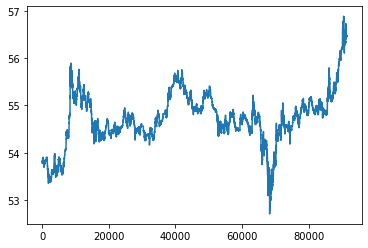

In [19]:
plt.plot(df["midpoint"])

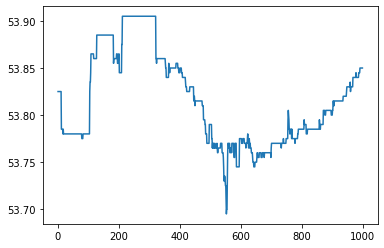

In [12]:
plt.plot(df["midpoint"][1:1000])

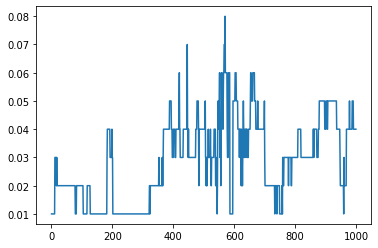

In [13]:
plt.plot(df["spread"][1:1000])

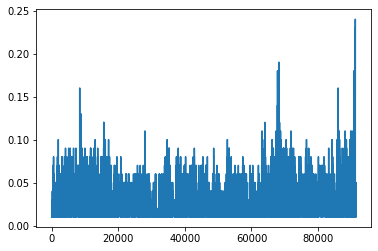

In [23]:
plt.plot(df["spread"])

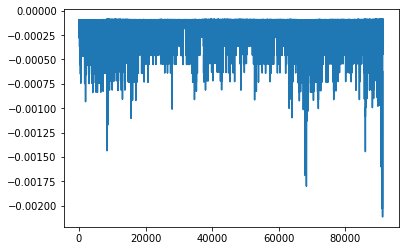

In [25]:
plt.plot(df["bids_distance_0"])

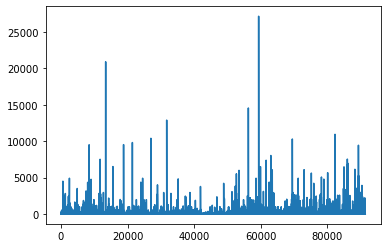

In [27]:
plt.plot(df["asks_market_notional_0"])

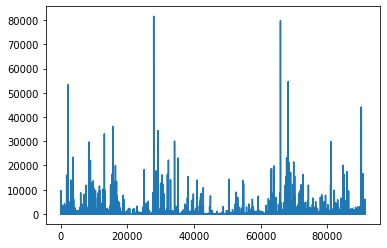

In [28]:
plt.plot(df["sells"])